In [1]:
%run 'Data Cleaning'.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

### Essential Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Logistic Regression


Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.9443
True Negative Rate      :  0.9892
True Positive Rate      :  0.6785
False Negative Rate     :  0.3215
False Positive Rate     :  0.0108

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.9439
True Negative Rate      :  0.9891
True Positive Rate      :  0.6764
False Negative Rate     :  0.3236
False Positive Rate     :  0.0109


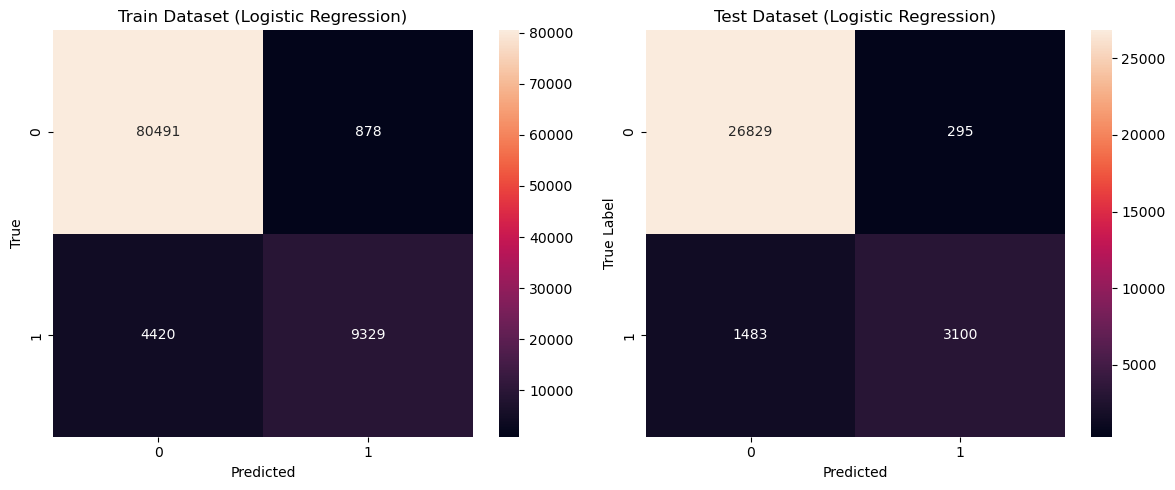

In [5]:
features = ["Fulfilment", "ship-service-level", "Category", "Amount", "promotion-ids"]
X = df[features].copy()
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
accuracy = accuracy_score(y_train, y_train_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Train Dataset")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
accuracy = accuracy_score(y_test, y_test_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Test Dataset")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket', ax=axes[0])
axes[0].set_title('Train Dataset (Logistic Regression)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket', ax=axes[1])
axes[1].set_title('Test Dataset (Logistic Regression)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

#### Insights
- Logistic Regression performs quite well in overall classification accuracy.
- However, due to class imbalance, the model favors the majority class (non-cancelled).
- Recall for cancelled orders (~67%) can be improved using more advanced models or threshold tuning.

### Random Forest

Goodness of Fit of Model: Train Dataset(Random Forest)
Classification Accuracy :  0.9498
True Negative Rate      :  0.9913
True Positive Rate      :  0.7039
False Negative Rate     :  0.2961
False Positive Rate     :  0.0087

Goodness of Fit of Model: Test Dataset(Random Forest)
Classification Accuracy :  0.9484
True Negative Rate      :  0.9908
True Positive Rate      :  0.6978
False Negative Rate     :  0.3022
False Positive Rate     :  0.0092


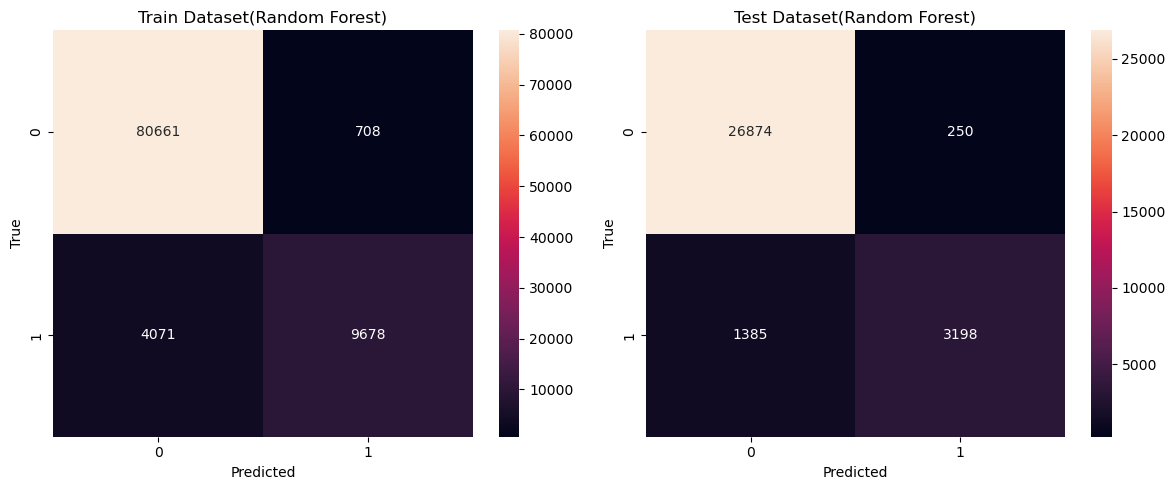

In [8]:
features = ["Fulfilment", "ship-service-level", "Category", "Amount", "promotion-ids"]
X = df[features].copy()
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_train, y_train_pred).ravel()
acc_t = accuracy_score(y_train, y_train_pred)
tpr_t = tp_t / (tp_t + fn_t)
tnr_t = tn_t / (tn_t + fp_t)
fnr_t = fn_t / (fn_t + tp_t)
fpr_t = fp_t / (fp_t + tn_t)

print("Goodness of Fit of Model: Train Dataset(Random Forest)")
print(f"Classification Accuracy :  {acc_t:.4f}")
print(f"True Negative Rate      :  {tnr_t:.4f}")
print(f"True Positive Rate      :  {tpr_t:.4f}")
print(f"False Negative Rate     :  {fnr_t:.4f}")
print(f"False Positive Rate     :  {fpr_t:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
accuracy = accuracy_score(y_test, y_test_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Test Dataset(Random Forest)")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

# Matrix Heatmaps
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket', ax=axes[0])
axes[0].set_title('Train Dataset(Random Forest)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket', ax=axes[1])
axes[1].set_title('Test Dataset(Random Forest)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

#### Insights
- Random Forest performs better than logistic regression, especially in recall.
- However, since we didn’t apply class weighting, the model is still biased toward the majority class (non-cancelled).
- Next step: use class_weight='balanced' or tune probability threshold to improve recall.

### Balanced Random Forest with Custom Threshold (Threshold = 0.4)


Goodness of Fit of Model: Train Dataset (Balanced,Threshold = 0.4)
Classification Accuracy :  0.8052
True Negative Rate      :  0.7763
True Positive Rate      :  0.9764
False Negative Rate     :  0.0236
False Positive Rate     :  0.2237

Goodness of Fit of Model: Test Dataset (Balanced, Threshold = 0.4)
Classification Accuracy :  0.8000
True Negative Rate      :  0.7739
True Positive Rate      :  0.9546
False Negative Rate     :  0.0454
False Positive Rate     :  0.2261


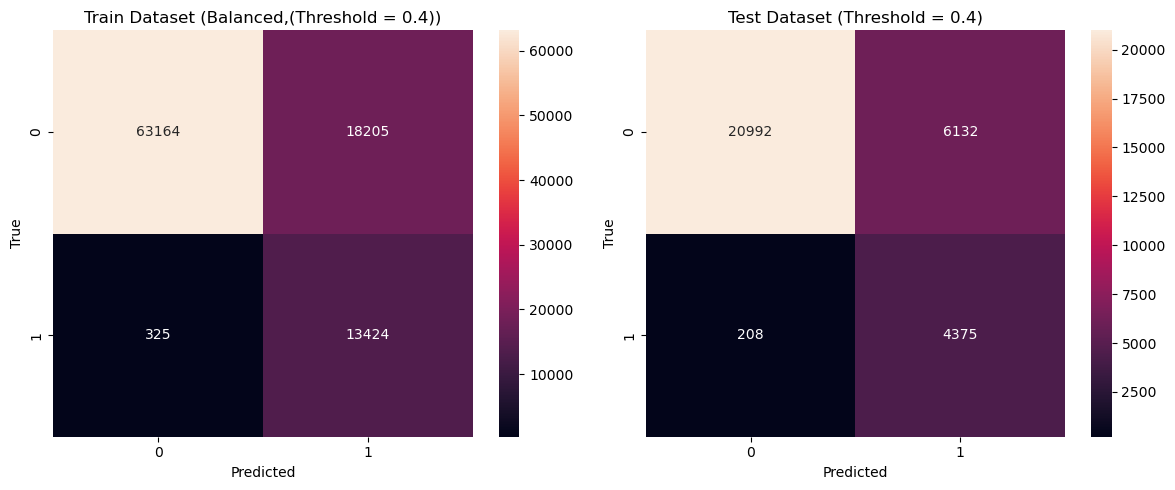

In [11]:
features = ["Fulfilment", "ship-service-level", "Category", "Amount", "promotion-ids"]
X = df[features].copy()
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

threshold = 0.4
y_train_proba = rf_model.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_proba >= threshold).astype(int)

y_test_proba = rf_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
accuracy = accuracy_score(y_train, y_train_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print(f"\nGoodness of Fit of Model: Train Dataset (Balanced,Threshold = {threshold})")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
accuracy = accuracy_score(y_test, y_test_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print(f"\nGoodness of Fit of Model: Test Dataset (Balanced, Threshold = {threshold})")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket', ax=axes[0])
axes[0].set_title(f'Train Dataset (Balanced,(Threshold = {threshold}))')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket', ax=axes[1])
axes[1].set_title(f'Test Dataset (Threshold = {threshold})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

#### Insights
- Stronger Recall: The model now captures almost all cancelled orders, which is critical for avoiding revenue loss in high-risk scenarios.
- Trade-off Visible: Accuracy dropped slightly due to the rise in false positives, but this is an expected and acceptable shift in risk-averse settings.
- Threshold = 0.4 makes the model "more generous" in flagging risks, which is useful when it's better to over-warn than to miss.

#### Recommendations
Use this version of the model when:
- Your business suffers high cost when orders are cancelled.
- Manual checking or intervention is available to review flagged orders.

For more cost-sensitive businesses, stick with a higher threshold and no class weights.

### XGBoost

In [14]:
!pip install xgboost
from xgboost import XGBClassifier


Goodness of Fit of Model: Train Dataset (XGBoost)
Classification Accuracy :  0.9476
True Negative Rate      :  0.9910
True Positive Rate      :  0.6911
False Negative Rate     :  0.3089
False Positive Rate     :  0.0090

Goodness of Fit of Model: Test Dataset (XGBoost)
Classification Accuracy :  0.9477
True Negative Rate      :  0.9914
True Positive Rate      :  0.6889
False Negative Rate     :  0.3111
False Positive Rate     :  0.0086


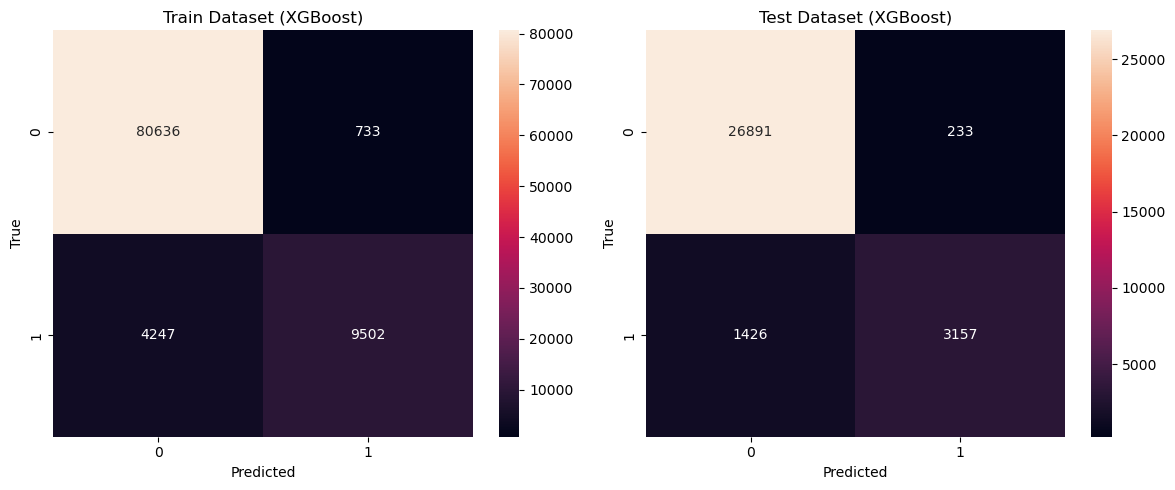

In [15]:
features = ["Fulfilment", "ship-service-level", "Category", "Amount", "promotion-ids"]
X = df[features].copy()
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
accuracy = accuracy_score(y_train, y_train_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Train Dataset (XGBoost)")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
accuracy = accuracy_score(y_test, y_test_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Test Dataset (XGBoost)")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket', ax=axes[0])
axes[0].set_title('Train Dataset (XGBoost)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket', ax=axes[1])
axes[1].set_title('Test Dataset (XGBoost)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

#### Insights
- XGBoost does not significantly outperform Random Forest in this case.
- This is likely because:

  1.The dataset is structured and tabular, which Random Forest already handles well.
  
  2.The features may not have strong nonlinear interactions that XGBoost typically excels at capturing.
- Classification Accuracy and recall are similar to previous models, suggesting that model complexity alone does not guarantee better results.

### XGBoost with Custom Threshold (Threshold = 0.4)


Goodness of Fit of Model: Train Dataset (Balanced)
Classification Accuracy :  0.8471
True Negative Rate      :  0.8367
True Positive Rate      :  0.9088
False Negative Rate     :  0.0912
False Positive Rate     :  0.1633

Goodness of Fit of Model: Test Dataset (Balanced)
Classification Accuracy :  0.8478
True Negative Rate      :  0.8383
True Positive Rate      :  0.9044
False Negative Rate     :  0.0956
False Positive Rate     :  0.1617


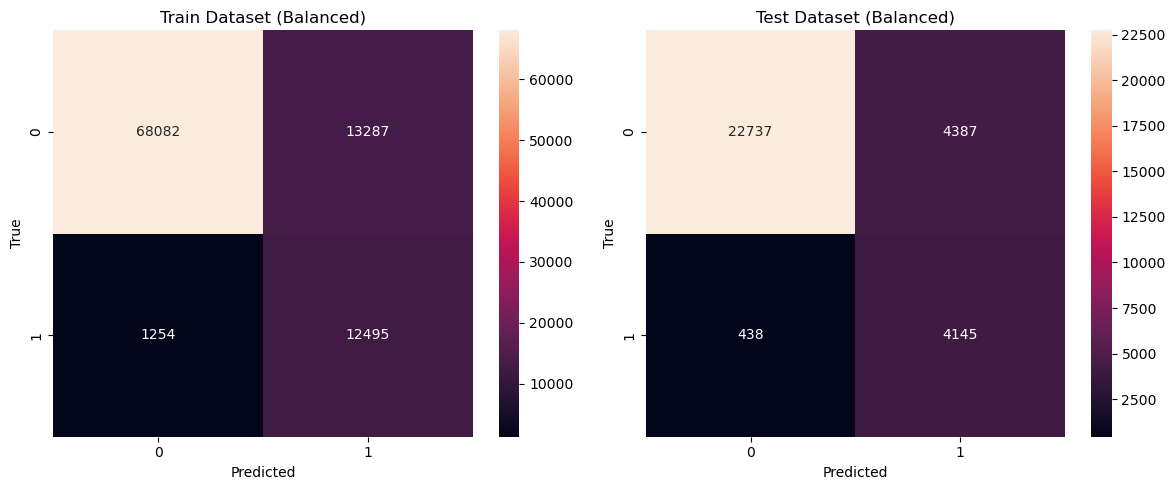

In [18]:
features = ["Fulfilment", "ship-service-level", "Category", "Amount", "promotion-ids"]
X = df[features].copy()
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

threshold = 0.5
y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_proba >= threshold).astype(int)

y_test_proba = xgb_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
accuracy = accuracy_score(y_train, y_train_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Train Dataset (Balanced)")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
accuracy = accuracy_score(y_test, y_test_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print("\nGoodness of Fit of Model: Test Dataset (Balanced)")
print(f"Classification Accuracy :  {accuracy:.4f}")
print(f"True Negative Rate      :  {tnr:.4f}")
print(f"True Positive Rate      :  {tpr:.4f}")
print(f"False Negative Rate     :  {fnr:.4f}")
print(f"False Positive Rate     :  {fpr:.4f}")

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket', ax=axes[0])
axes[0].set_title('Train Dataset (Balanced)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket', ax=axes[1])
axes[1].set_title('Test Dataset (Balanced)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

#### Insights
- Using scale_pos_weight helps the model pay more attention to the minority class (cancelled orders).
- The model’s recall improves with only a small increase in false positives